## Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

No     5174
Yes    1869
Name: Churn, dtype: int64

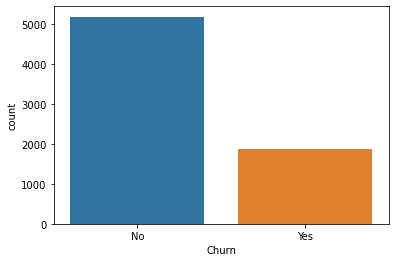

In [7]:
sns.countplot(df.Churn)
df["Churn"].value_counts()

In [8]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6231-WFGFH,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

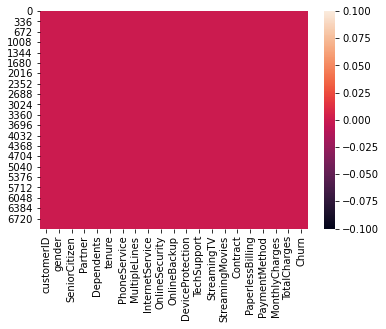

In [10]:
sns.heatmap(df.isnull())
# No Nulls

In [11]:
# Removing Customer ID
df.drop('customerID',axis=1,inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

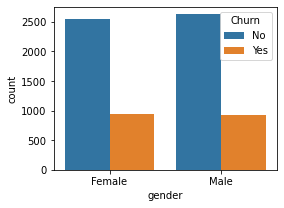

In [12]:
# Gender wise
plt.figure(figsize=(4,3)) 
sns.countplot('gender',data=df,hue='Churn')

<AxesSubplot:>

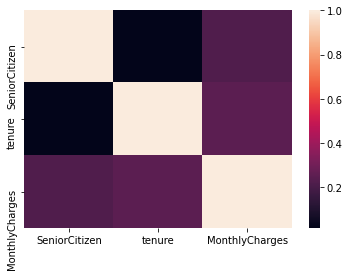

In [13]:
sns.heatmap(df.corr())

In [14]:
#Lets convert "TotalCharges" to float dtype
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

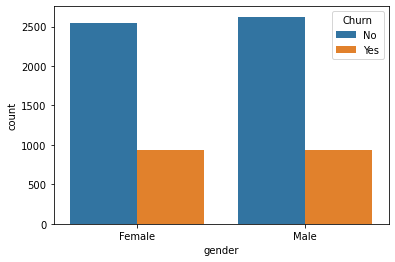

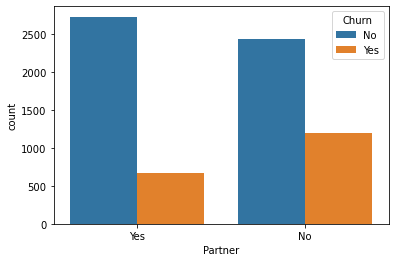

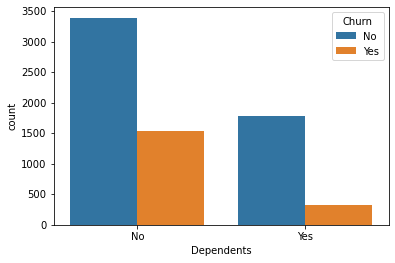

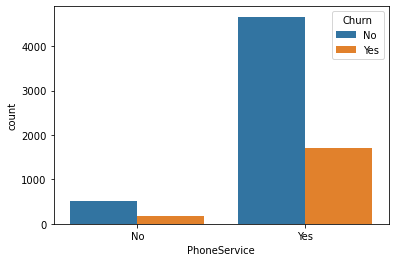

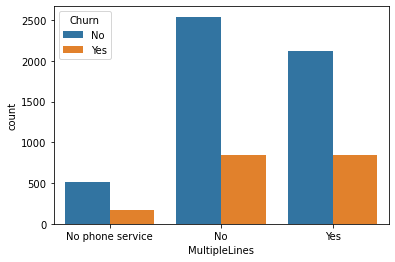

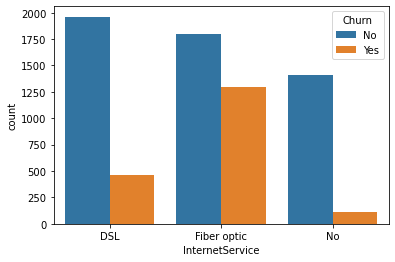

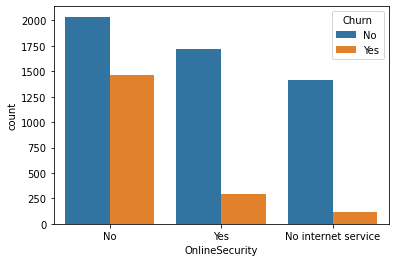

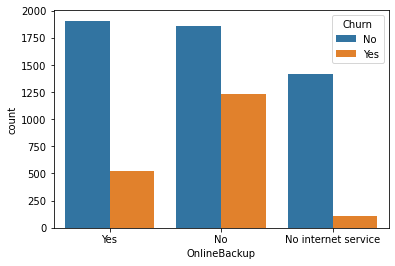

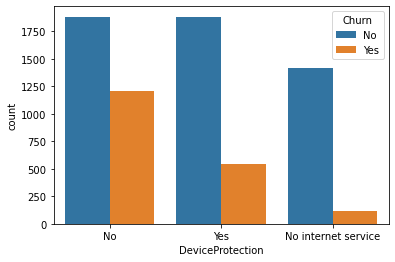

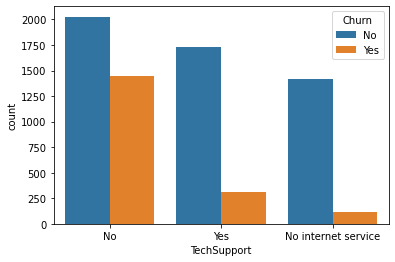

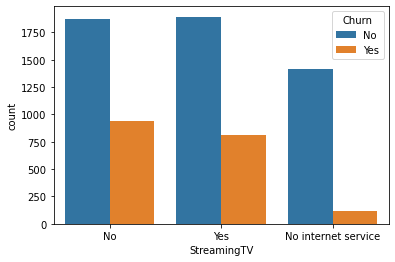

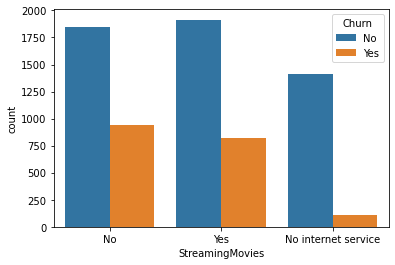

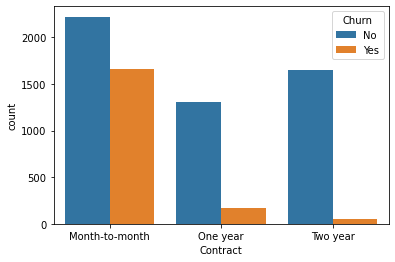

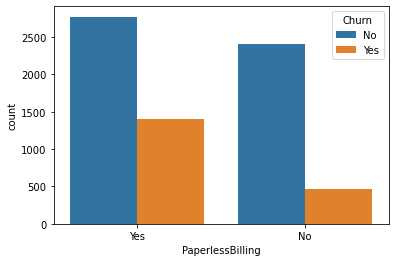

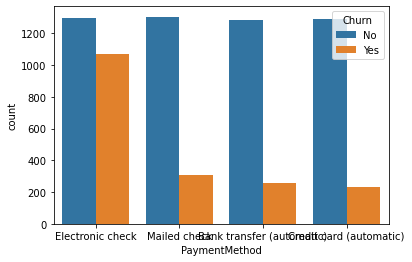

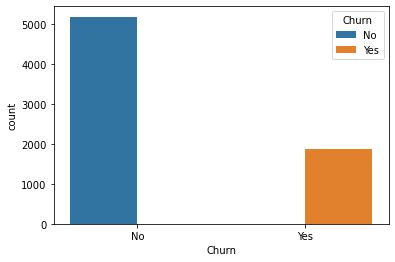

In [16]:
#Lets plot the counts of each column of object datatype
for col in df.columns:
    if df[col].dtype=="object":
        sns.countplot(df[col],hue=df['Churn'])
        plt.show()

In [17]:
# Let's separate Features and Labels
df_x=df.drop(columns=["Churn"])
y=df[["Churn"]]

In [18]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [19]:
# Let's Label ENcode the objects
col=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
le=LabelEncoder()
df_x[col] = df_x[col].apply(LabelEncoder().fit_transform)

In [20]:
df_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [21]:
# Let's do Standard Scaling(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193


In [25]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_resample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [26]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean roc auc score for classifier: ",scores.mean())
    print("standard deviation in roc auc score for classifier: ",scores.std())
    print(scores)

In [27]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

max auc roc score corresponding to  44  is  0.79165439561859


44

In [28]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

max auc roc score corresponding to  58  is  0.6951962076002998


58

In [29]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [30]:
rfc=RandomForestClassifier(n_estimators=500)
r_state=max_aucroc_score(rfc,x,y)

max auc roc score corresponding to  75  is  0.7449766204241907


In [31]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 19}

In [32]:
knn=KNeighborsClassifier(n_neighbors=19)
r_state=max_aucroc_score(knn,x,y)

max auc roc score corresponding to  64  is  0.7528610917357721


In [33]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=max_aucroc_score(gb,x,y)

max auc roc score corresponding to  72  is  0.7811736288718386


In [34]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
r_state=max_aucroc_score(ad,x,y)

max auc roc score corresponding to  44  is  0.7912617220801363


In [36]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg_clf,x,y)


print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)

print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)



Random Forest Classifier


Mean roc auc score for classifier:  0.824191021628599
standard deviation in roc auc score for classifier:  0.012423863295524324
[0.83668527 0.83963678 0.80901728 0.81209154 0.82352424]


KNN Classifier


Mean roc auc score for classifier:  0.8106085805518966
standard deviation in roc auc score for classifier:  0.01452200389288772
[0.83084554 0.82425792 0.80620657 0.79435573 0.79737714]


DecisionTree Classifier


Mean roc auc score for classifier:  0.654351041839367
standard deviation in roc auc score for classifier:  0.019222919650408597
[0.66621845 0.66319977 0.64341626 0.62243204 0.67648869]


Logistic Regression Classifier


Mean roc auc score for classifier:  0.8441356776400525
standard deviation in roc auc score for classifier:  0.01079889976255062
[0.85526105 0.85854711 0.8310225  0.83680823 0.8390395 ]


Gradient Boost


Mean roc auc score for classifier:  0.8457919312432829
standard deviation in roc auc score for classifier:  0.010637263881988483
[

In [39]:
# Selecting Model

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =43 ,test_size=0.20)
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

Confusion matrix 
 [[852 187]
 [106 264]]


Gradient Boost


Mean roc auc score for classifier:  0.8457748749486662
standard deviation in roc auc score for classifier:  0.010649357902062711
[0.85651786 0.85804981 0.82909143 0.84373859 0.84147669]
classification report 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1039
           1       0.59      0.71      0.64       370

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409

AUC_Score: 0.7667663813958329
[1 0 0 ... 0 1 0]


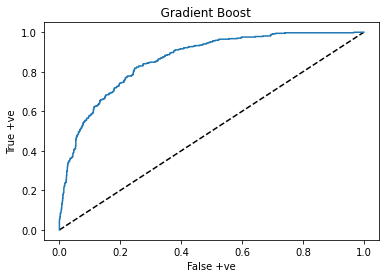

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
#print('r2 Score is:', r2_score(y_test,y_pred))
#print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=    gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='  Gradient Boost    ')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('   Gradient Boost      ')
plt.show
print(y_pred)

In [41]:
import pickle
with open ('Customer_Churn.pkl','wb') as f:
    pickle.dump(gb,f)